# Nicaviz Demo

_By Nicapotato_

In [1]:
%reload_ext autoreload
%autoreload 2
%load_ext watermark

In [2]:
import pandas as pd
import numpy as np
from numpy import random
import nicaviz
import seaborn as sns

sns.set_style("whitegrid")

%watermark 
%watermark --iversions

Last updated: 2021-09-22T12:41:49.235880+01:00

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.13.0

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

nicaviz: 0.0.5
numpy  : 1.18.1
seaborn: 0.10.1
pandas : 1.2.3



In [3]:
def random_dates(start, end, n=10):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

DFLEN = 5000
df = pd.DataFrame({
    'int_small': random.randint(low=0, high=5, size=DFLEN),
    'int_med': random.randint(low=0, high=20, size=DFLEN),
    'str_med': random.choice(["a","b","c","d","e","f","g"], size=DFLEN),
    'str_med_two': random.choice([x for x in "qwerty"], size=DFLEN),
    'str_small': random.choice(["blue","red"], size=DFLEN),
    'bool': random.choice([True,False], size=DFLEN),
    'cont_rand': random.random(size=DFLEN)*10,
    'cont_uni': random.normal(loc=0, scale=1, size=DFLEN)*10,
    'date': pd.date_range(start='1/1/2018', periods=DFLEN),
    'timestamp': random_dates(pd.to_datetime('2018-01-01'), pd.to_datetime('2018-03-01'), n=DFLEN)
    })

display(df.sample(10))

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
2175,1,19,e,r,red,True,5.755440,-0.687243,2023-12-16,2018-02-09 14:00:33
3854,1,18,e,t,red,False,3.420540,1.608824,2028-07-21,2018-01-14 18:47:56
4720,1,10,f,y,red,False,2.838706,12.154198,2030-12-04,2018-02-16 02:31:42
4374,1,17,d,e,blue,False,0.136264,-4.017928,2029-12-23,2018-02-23 04:29:32
2411,0,4,e,w,blue,True,7.454176,-13.292152,2024-08-08,2018-01-18 08:16:36
4649,1,0,f,e,blue,True,5.196697,-0.903222,2030-09-24,2018-02-07 00:32:11
1912,1,6,d,t,red,False,2.043412,9.667828,2023-03-28,2018-01-11 06:33:17
3285,0,8,f,t,red,False,2.846532,-3.103178,2026-12-30,2018-01-09 08:12:17
1579,0,19,f,e,blue,False,1.041694,8.439652,2022-04-29,2018-02-19 03:42:05
4680,2,6,d,y,blue,False,9.996933,-6.754716,2030-10-25,2018-01-09 17:43:35


In [4]:
df.head()

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
0,4,14,c,t,blue,True,7.463405,1.009829,2018-01-01,2018-01-21 04:13:30
1,4,19,a,r,blue,True,0.654330,-6.056343,2018-01-02,2018-02-07 15:55:36
2,0,5,f,y,red,False,6.598602,2.008427,2018-01-03,2018-02-21 20:37:56
3,2,6,a,w,red,False,6.202166,-7.933663,2018-01-04,2018-01-15 22:51:20
4,0,14,g,w,blue,True,5.908794,-14.517571,2018-01-05,2018-01-14 23:37:27


In [5]:
df.nica.categorical_describe()

Dataframe Dimension: 5000 Rows, 10 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
int_small,5,0,int64,0,1041,4,1016,1,1003.0,3,999.0,2,941.0
int_med,20,0,int64,1,285,18,275,10,262.0,16,258.0,2,257.0
str_med,7,0,object,c,761,f,750,b,722.0,a,710.0,e,701.0
str_med_two,6,0,object,q,884,t,850,r,824.0,e,823.0,w,816.0
str_small,2,0,object,red,2501,blue,2499,NaN,NaN,NaN,NaN,NaN,NaN
bool,2,0,bool,False,2552,True,2448,NaN,NaN,NaN,NaN,NaN,NaN
cont_rand,5000,0,float64,2.110204,1,2.548989,1,9.830802,1.0,3.270628,1.0,3.344961,1.0
cont_uni,5000,0,float64,5.197885,1,20.504019,1,-0.724276,1.0,24.287727,1.0,-19.874603,1.0
date,5000,0,datetime64[ns],2026-04-30 00:00:00,1,2020-10-31 00:00:00,1,2021-09-28 00:00:00,1.0,2030-04-04 00:00:00,1.0,2025-12-02 00:00:00,1.0


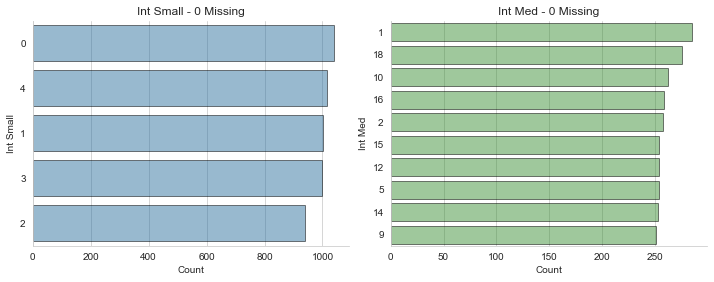

In [6]:
df.nica.mass_plot(
    plt_set= ["int_small", "int_med"],
    plottype = "countplot")

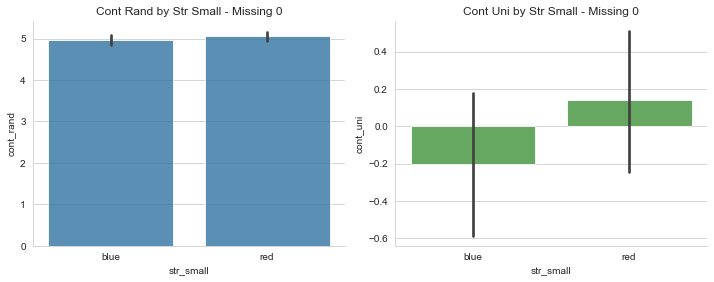

In [7]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    x_var = "str_small",
    plottype = "bar")

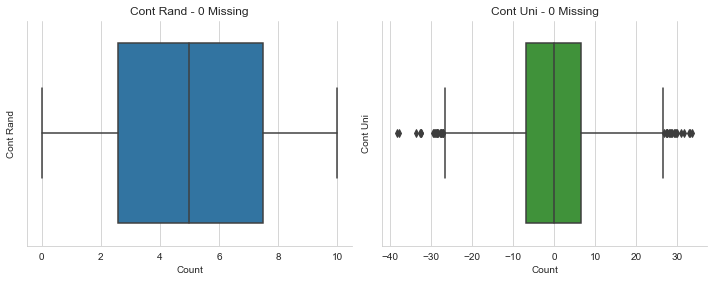

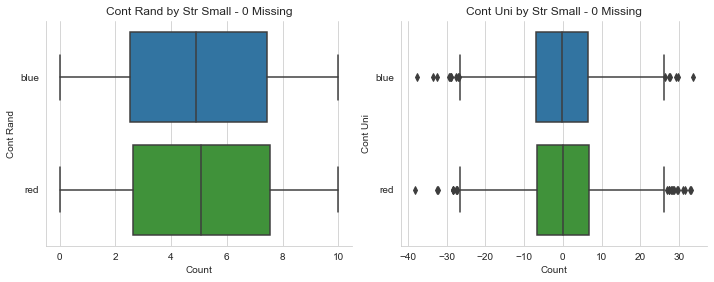

In [8]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "boxplot")

df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    hue = "str_small",
    plottype = "boxplot")

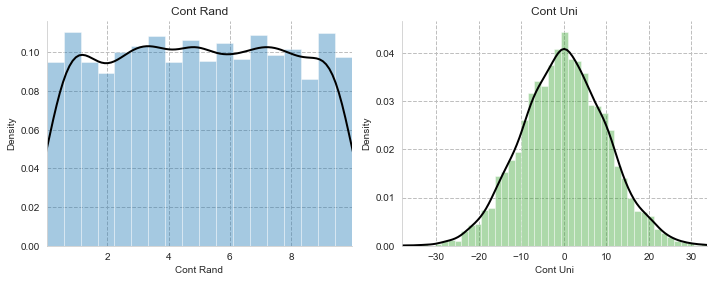

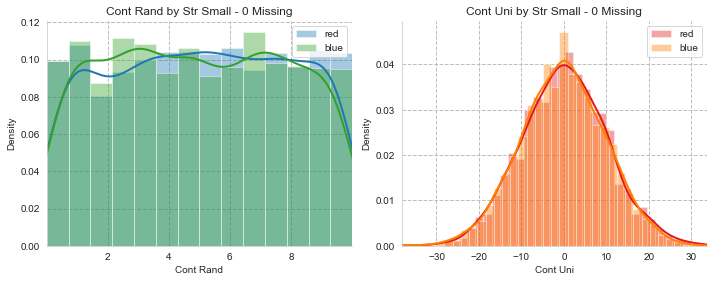

In [9]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "distplot")

df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    hue = "str_small",
    plottype = "distplot")

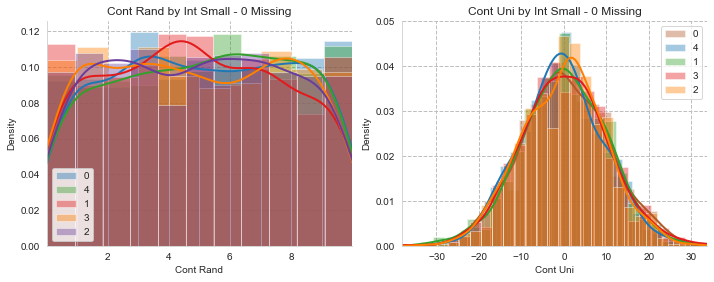

In [10]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    hue = "int_small",
    plottype = "distplot")

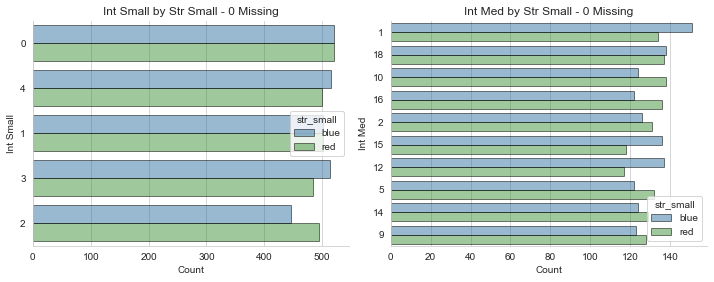

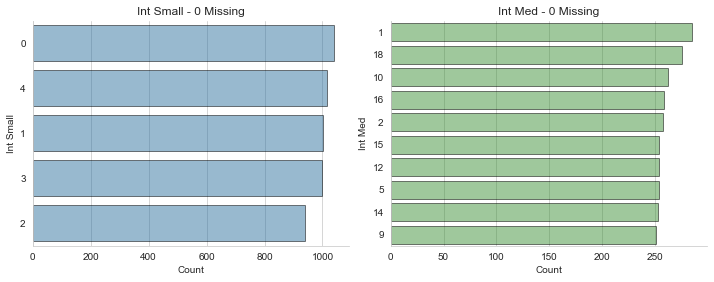

In [11]:
df.nica.mass_plot(
    plt_set= ["int_small", "int_med"],
    hue = "str_small",
    plottype = "countplot")

df.nica.mass_plot(
    plt_set= ["int_small", "int_med"],
    plottype = "countplot")

### Time Series

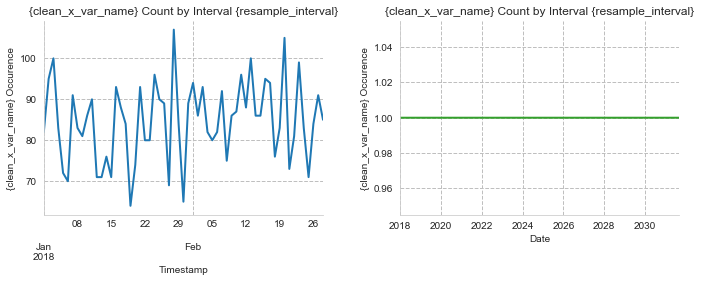

In [12]:
df.nica.mass_plot(
    plt_set= ["timestamp", "date"],
    plottype = "ts_resample",
    resample=True,
    resample_interval="1D"
)

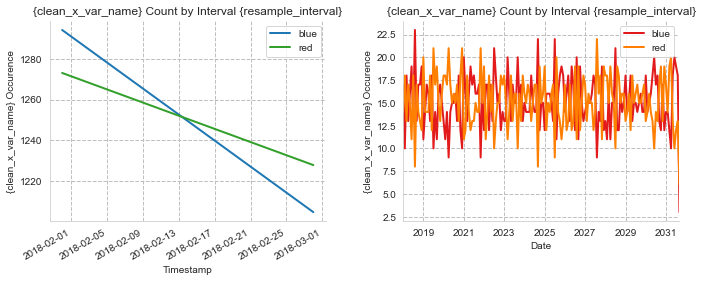

In [13]:
df.nica.mass_plot(
    plt_set= ["timestamp", "date"],
    plottype = "ts_resample",
    resample=True,
    hue = "str_small",
    resample_interval="1M"
)

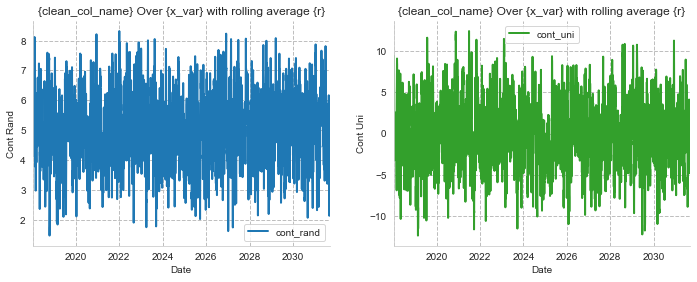

In [14]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "ts_rolling",
    x_var="date",
    rolling=True,
    r=7
)

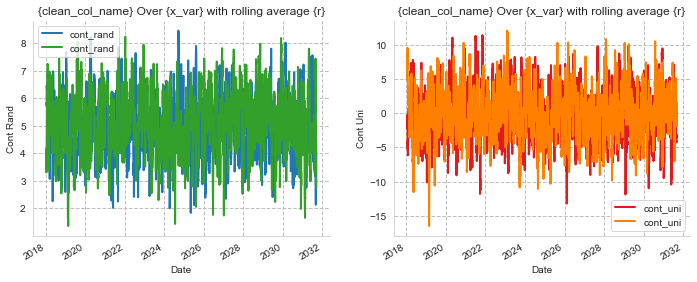

In [15]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "ts_rolling",
    hue = "str_small",
    x_var="date",
    rolling=True,
    r=7
)

### WordClouds

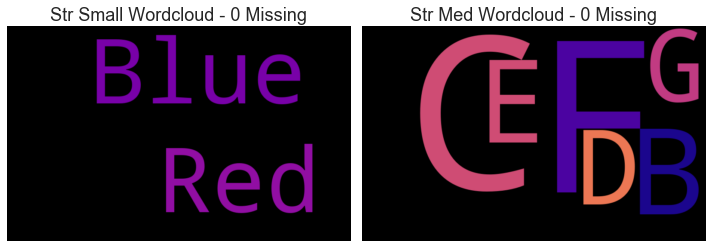

In [16]:
df.nica.mass_plot(
    plt_set= ["str_small", "str_med"],
    plottype = "wordcloud")

### Rank Correlations

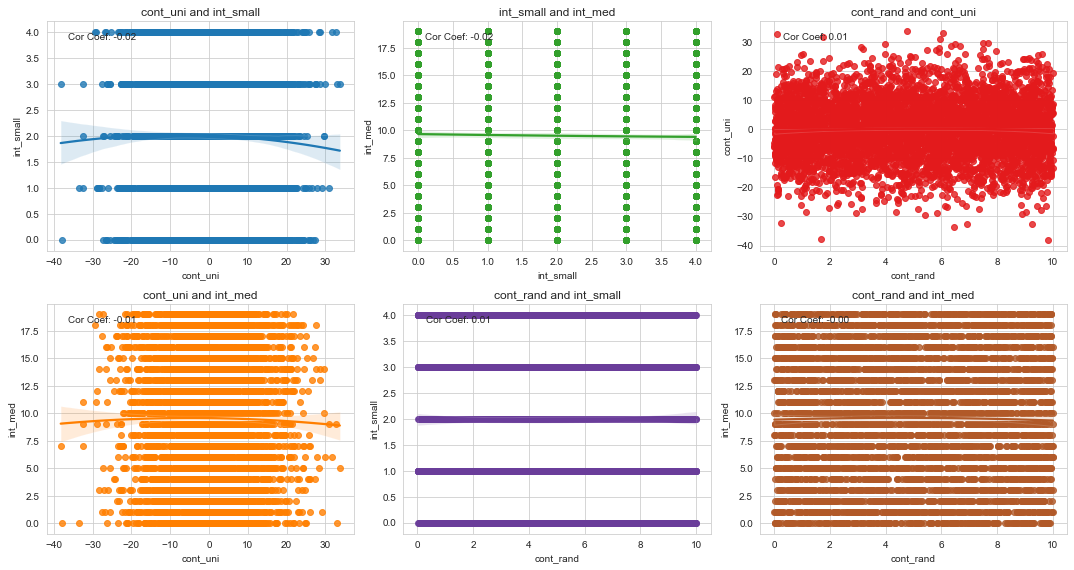

In [17]:
df.nica.rank_correlations_plots(["cont_rand", "cont_uni", "int_small", "int_med"], 9)

### Pivot Heatmaps

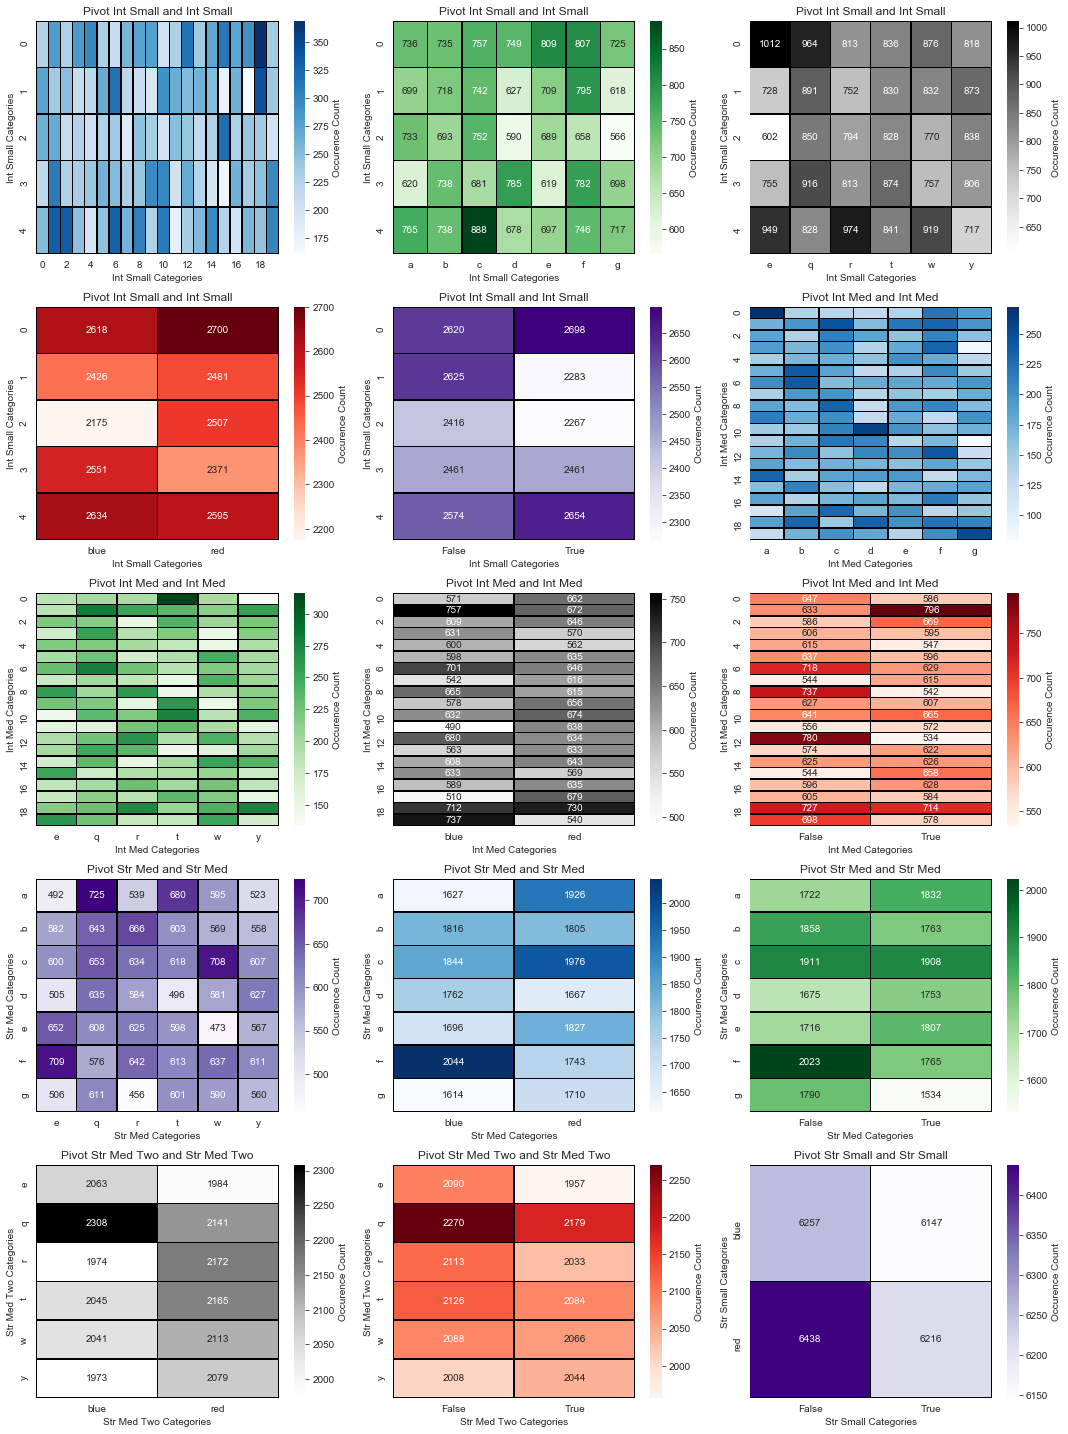

In [18]:
categorical = ['int_small', 'int_med', 'str_med', 'str_med_two', 'str_small', 'bool']
df.nica.pivot_plots(categorical, "cont_rand", np.sum)

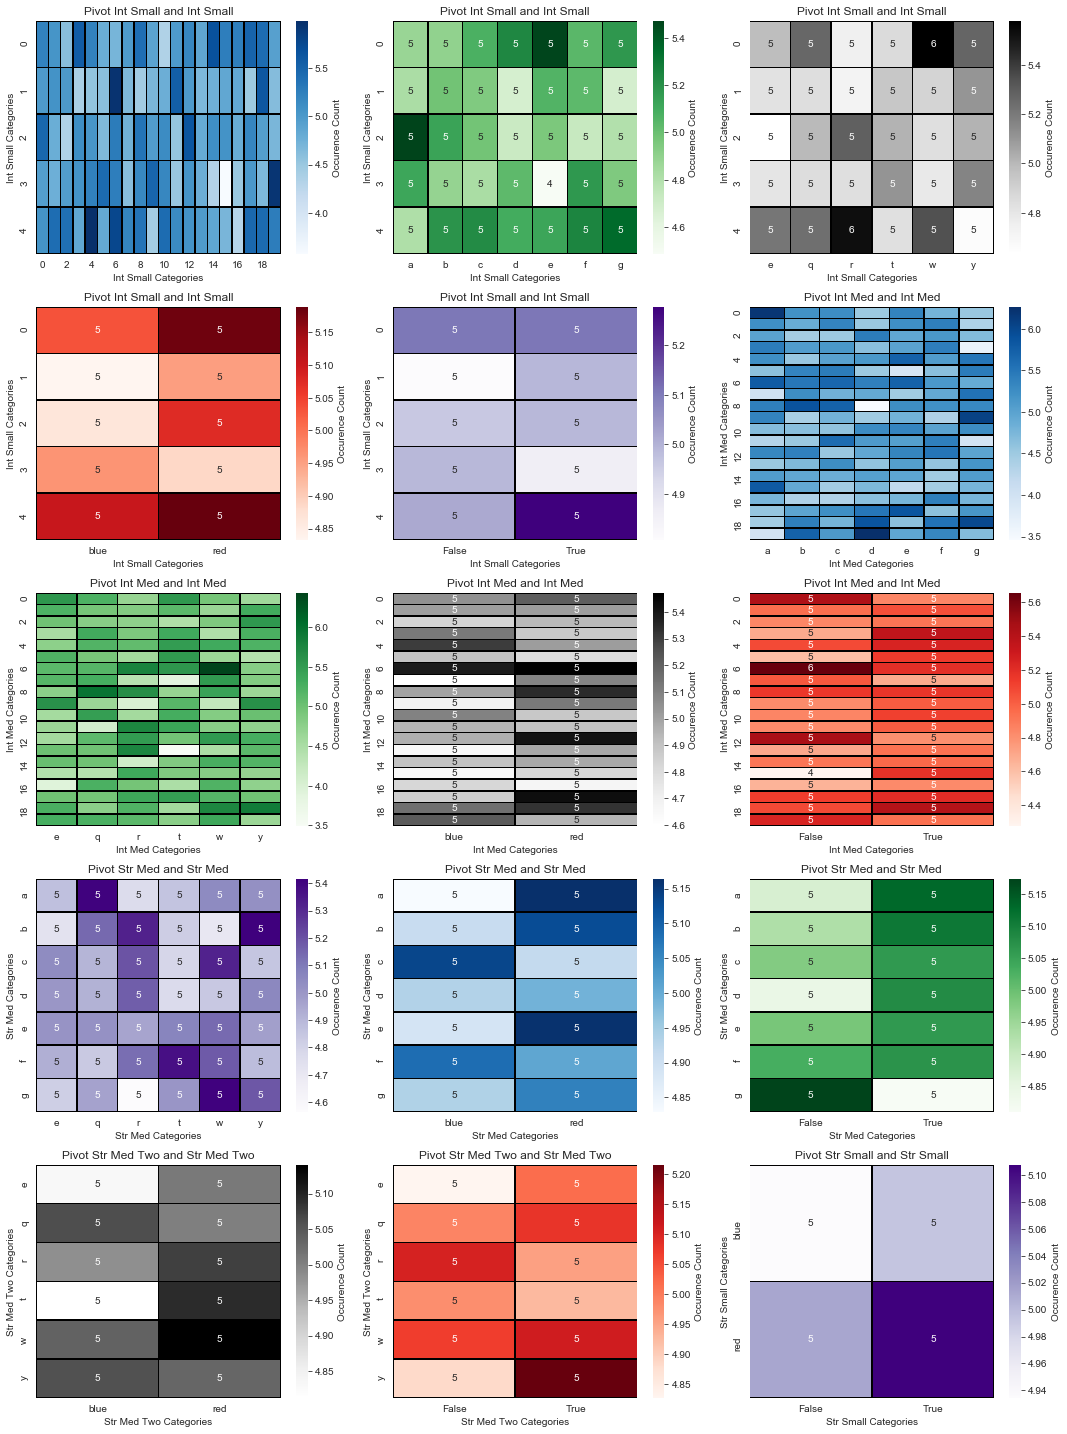

In [19]:
df.nica.pivot_plots(categorical, "cont_rand", np.mean)